In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [4]:
# Function to pad or truncate MFCC feature vectors to the same length
def pad_or_truncate(mfcc, target_length):
    current_length = mfcc.shape[0] * mfcc.shape[1]  # Total number of elements
    flattened = mfcc.flatten()  # Flatten the MFCC data
    
    if current_length < target_length:
        # Pad with zeros if shorter
        padded = np.pad(flattened, (0, target_length - current_length), 'constant')
        return padded
    elif current_length > target_length:
        # Truncate if longer
        return flattened[:target_length]
    else:
        return flattened

# Get the maximum length of MFCC features across all files
max_length = max([mfcc.shape[0] * mfcc.shape[1] for mfcc in all_data])

# Preprocess the data with padding/truncating to ensure uniform length
def preprocess_mfcc(data, max_length):
    imputer = SimpleImputer(strategy='mean')
    preprocessed_data = []

    for mfcc in data:
        imputed = imputer.fit_transform(mfcc)  # Impute missing values
        padded_or_truncated = pad_or_truncate(imputed, max_length)  # Pad/truncate
        preprocessed_data.append(padded_or_truncated)
    
    return np.array(preprocessed_data)

preprocessed_data = preprocess_mfcc(all_data, max_length)

print("Shape of preprocessed MFCC data:", preprocessed_data.shape)


Shape of preprocessed MFCC data: (116, 755269)


In [5]:
from scipy.spatial.distance import pdist, squareform

# Compute pairwise Euclidean distance between songs' MFCC data
distance_matrix = squareform(pdist(preprocessed_data, metric='euclidean'))

print("Distance matrix shape:", distance_matrix.shape)


Distance matrix shape: (116, 116)


t-SNE reduced features shape: (116, 2)


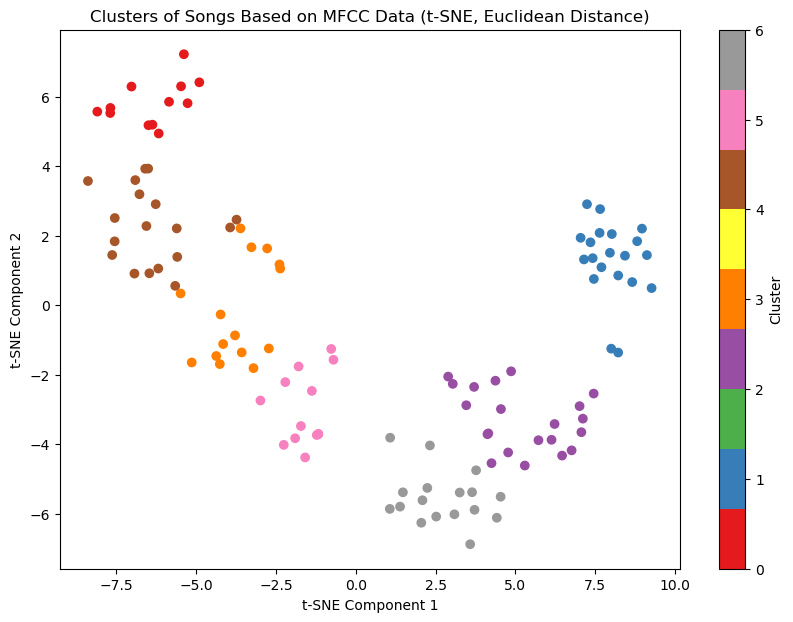

In [7]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

# Apply t-SNE with "random" initialization, since PCA cannot be used with precomputed metric
tsne = TSNE(n_components=2, metric='precomputed', random_state=42, init='random')
reduced_2d = tsne.fit_transform(distance_matrix)

print("t-SNE reduced features shape:", reduced_2d.shape)

# Apply K-Means clustering with 7 clusters
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(reduced_2d)

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(reduced_2d[:, 0], reduced_2d[:, 1], c=clusters, cmap='Set1')
plt.title('Clusters of Songs Based on MFCC Data (t-SNE, Euclidean Distance)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()
